# COVID-19 India Analysis
## Objective: 
Analyze the COVID-19 dataset to understand the spread of cases, deaths, and recoveries across countries and over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

##  Data Preprocessing
Convert the `Date` column into proper datetime format and check dataset consistency.


In [23]:
covid = pd.read_csv("../resources/covid_19_india.csv", encoding="latin1")
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [24]:
covid.info()
covid.describe()
covid.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [25]:
covid["Date"] = pd.to_datetime(covid["Date"])
covid = covid.sort_values("Date")
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


##  Overall Case Trends



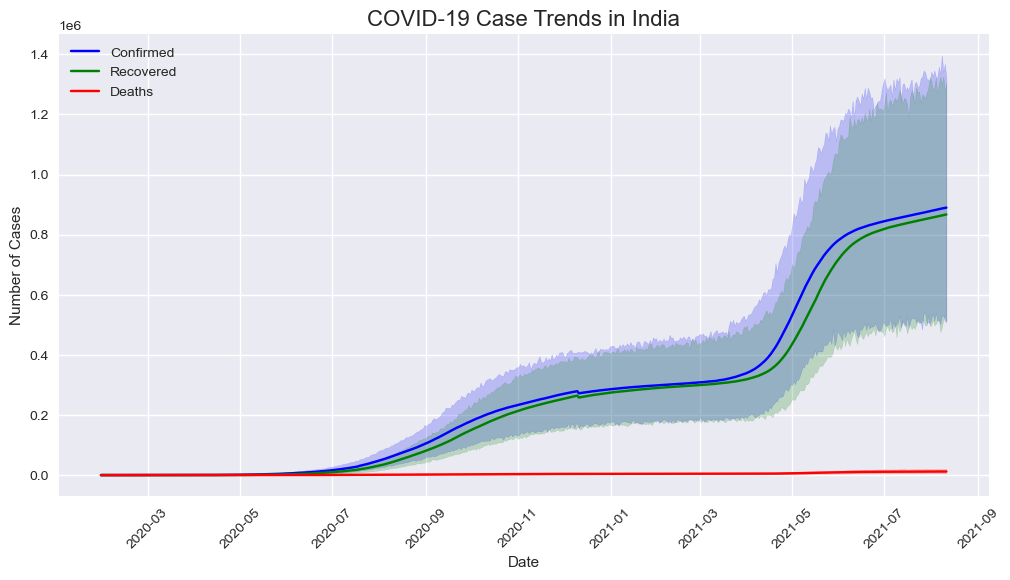

In [10]:
plt.figure(figsize=(12,6))

sns.lineplot(data=covid, x="Date", y="Confirmed", label="Confirmed", color="blue")
sns.lineplot(data=covid, x="Date", y="Cured", label="Recovered", color="green")
sns.lineplot(data=covid, x="Date", y="Deaths", label="Deaths", color="red")

plt.title("COVID-19 Case Trends in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.show()


##  State-wise Total Cases

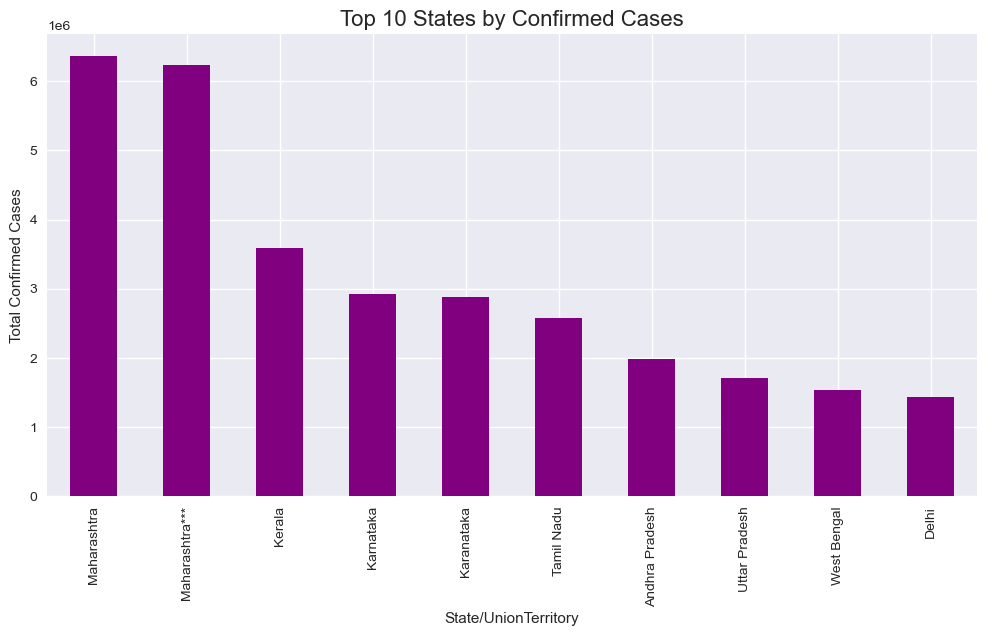

In [11]:
state_totals = covid.groupby("State/UnionTerritory")["Confirmed"].max().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_totals.head(10).plot(kind="bar", color="purple")

plt.title("Top 10 States by Confirmed Cases", fontsize=16)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Total Confirmed Cases")
plt.show()


## Top States by Deaths


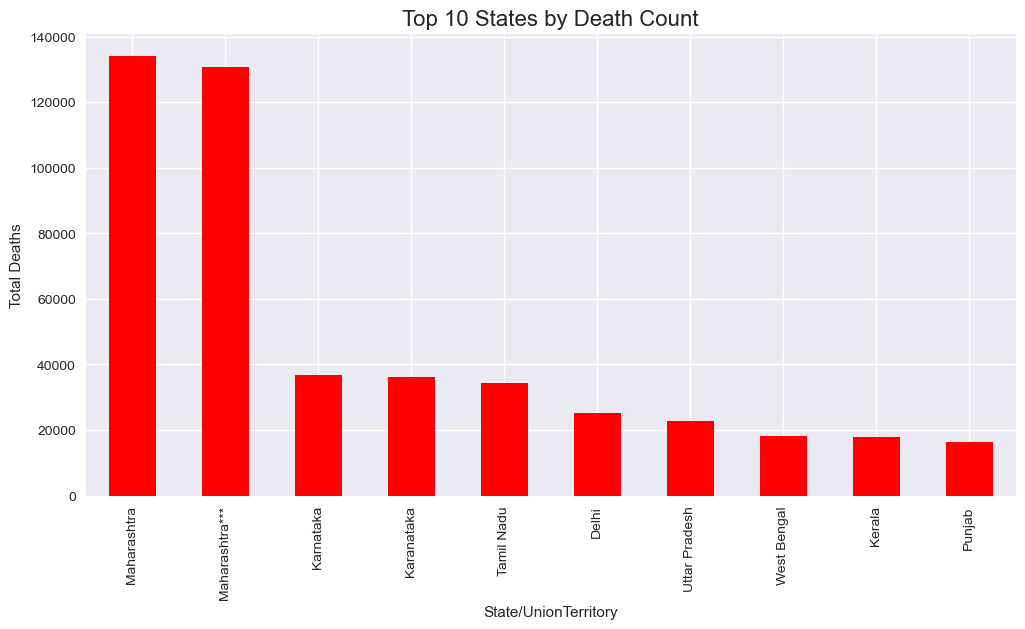

In [12]:
death_totals = covid.groupby("State/UnionTerritory")["Deaths"].max().sort_values(ascending=False)

plt.figure(figsize=(12,6))
death_totals.head(10).plot(kind="bar", color="red")

plt.title("Top 10 States by Death Count", fontsize=16)
plt.xlabel("State/UnionTerritory")
plt.ylabel("Total Deaths")
plt.show()


##  Growth of Cases Over Time


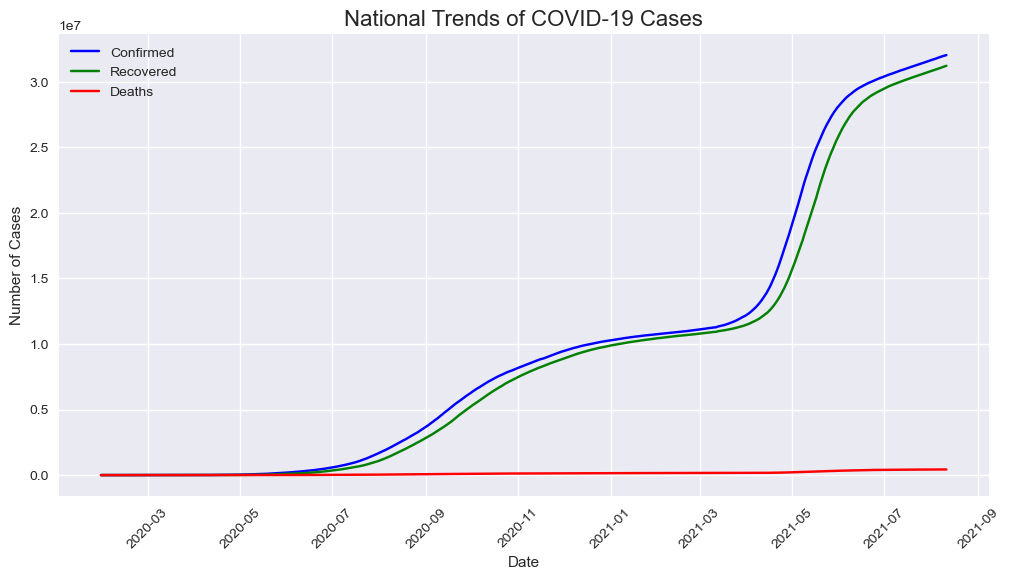

In [13]:
# National totals per day
national_trends = covid.groupby("Date")[["Confirmed","Cured","Deaths"]].sum()

plt.figure(figsize=(12,6))
sns.lineplot(data=national_trends, x=national_trends.index, y="Confirmed", label="Confirmed", color="blue")
sns.lineplot(data=national_trends, x=national_trends.index, y="Cured", label="Recovered", color="green")
sns.lineplot(data=national_trends, x=national_trends.index, y="Deaths", label="Deaths", color="red")

plt.title("National Trends of COVID-19 Cases", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.show()


##  Recovery & Mortality Rates

In [17]:
# Use the latest national totals
latest = national_trends.iloc[-1]

recovery_rate = (latest["Cured"] / latest["Confirmed"]) * 100
mortality_rate = (latest["Deaths"] / latest["Confirmed"]) * 100

print(f"Recovery Rate: {recovery_rate:.2f}%")
print(f"Mortality Rate: {mortality_rate:.2f}%")


Recovery Rate: 97.45%
Mortality Rate: 1.34%


## Daily New Cases, Recoveries & Deaths

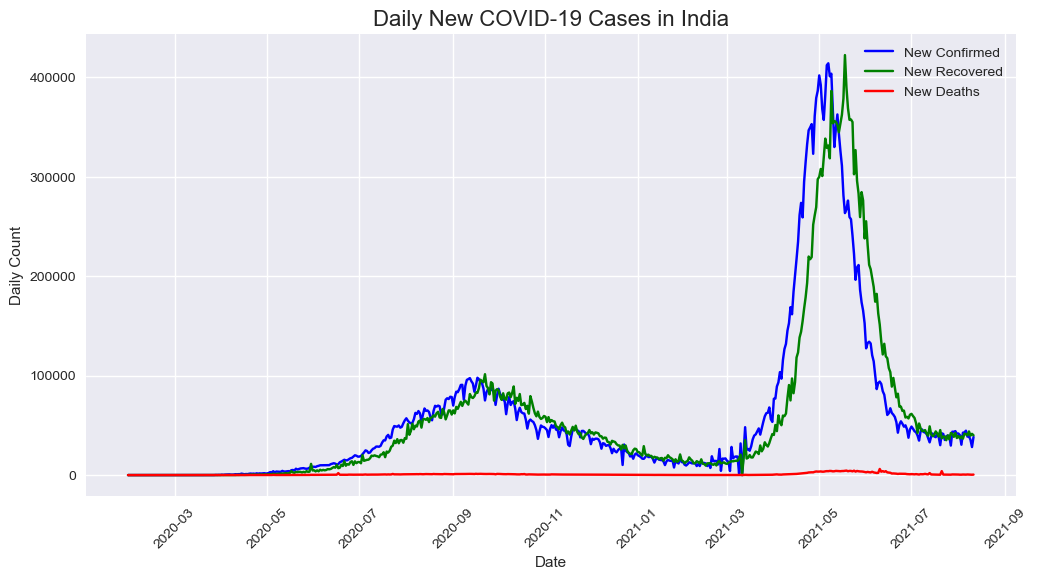

In [18]:
# Daily new cases
national_trends["New Confirmed"] = national_trends["Confirmed"].diff().fillna(0)
national_trends["New Cured"] = national_trends["Cured"].diff().fillna(0)
national_trends["New Deaths"] = national_trends["Deaths"].diff().fillna(0)

plt.figure(figsize=(12,6))
sns.lineplot(data=national_trends, x=national_trends.index, y="New Confirmed", label="New Confirmed", color="blue")
sns.lineplot(data=national_trends, x=national_trends.index, y="New Cured", label="New Recovered", color="green")
sns.lineplot(data=national_trends, x=national_trends.index, y="New Deaths", label="New Deaths", color="red")

plt.title("Daily New COVID-19 Cases in India", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Daily Count")
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Peak Analysis

In [19]:
print("Peak New Cases:", national_trends["New Confirmed"].idxmax(), 
      national_trends["New Confirmed"].max())

print("Peak New Deaths:", national_trends["New Deaths"].idxmax(), 
      national_trends["New Deaths"].max())

print("Peak New Recoveries:", national_trends["New Cured"].idxmax(), 
      national_trends["New Cured"].max())


Peak New Cases: 2021-05-07 00:00:00 414188.0
Peak New Deaths: 2021-06-10 00:00:00 6148.0
Peak New Recoveries: 2021-05-18 00:00:00 422436.0


## State-Level Trends 

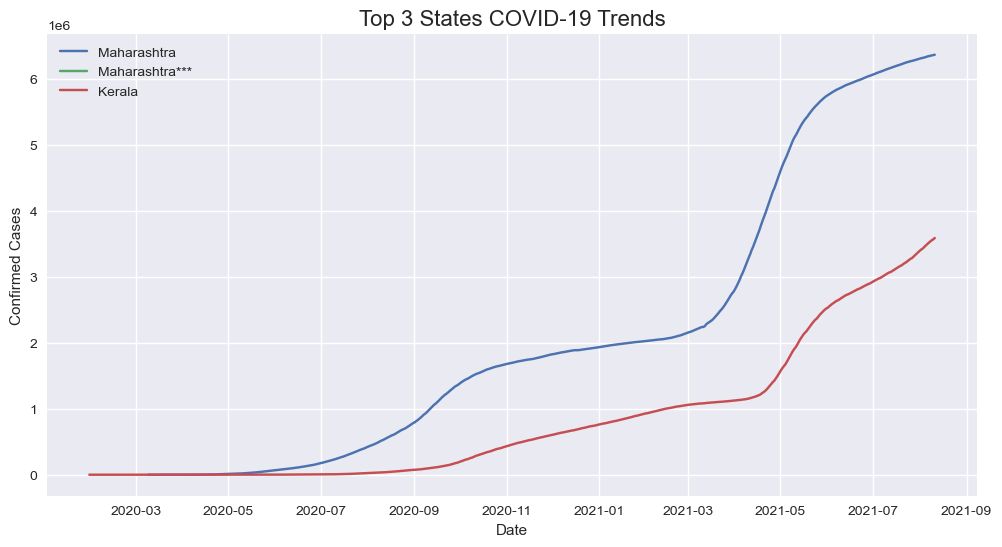

In [21]:
top_states = state_totals.head(3).index
plt.figure(figsize=(12,6))

for state in top_states:
    state_data = covid[covid["State/UnionTerritory"] == state].groupby("Date")["Confirmed"].max()
    plt.plot(state_data.index, state_data.values, label=state)

plt.title("Top 3 States COVID-19 Trends", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


## Correlation Heatmap

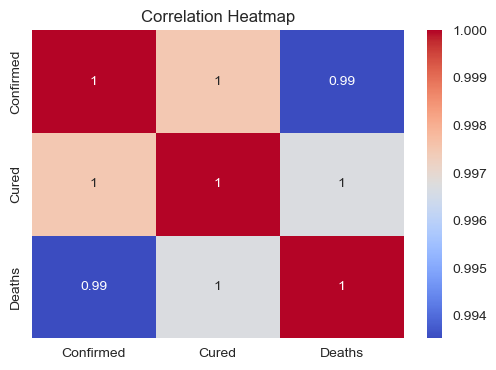

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(national_trends[["Confirmed","Cured","Deaths"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


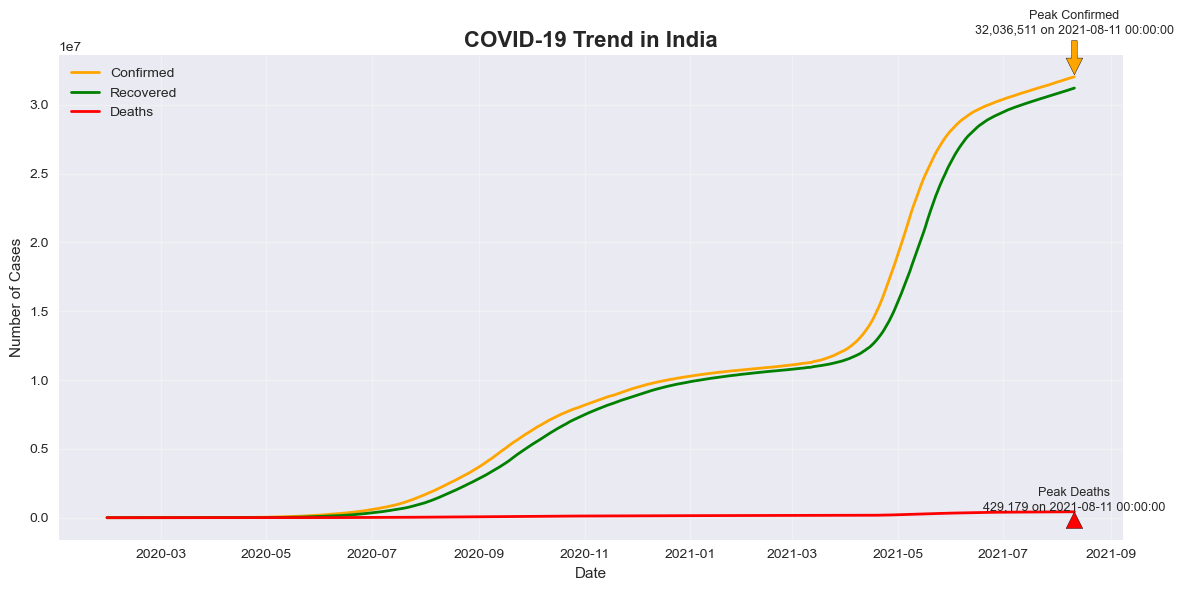

In [28]:
import matplotlib.pyplot as plt

timeline = covid.groupby("Date")[["Confirmed", "Cured", "Deaths"]].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(timeline["Date"], timeline["Confirmed"], label="Confirmed", color="orange", linewidth=2)
plt.plot(timeline["Date"], timeline["Cured"], label="Recovered", color="green", linewidth=2)
plt.plot(timeline["Date"], timeline["Deaths"], label="Deaths", color="red", linewidth=2)

peak_confirmed_idx = timeline["Confirmed"].idxmax()
peak_deaths_idx = timeline["Deaths"].idxmax()

peak_confirmed_date = timeline.loc[peak_confirmed_idx, "Date"]
peak_confirmed_value = timeline.loc[peak_confirmed_idx, "Confirmed"]

peak_deaths_date = timeline.loc[peak_deaths_idx, "Date"]
peak_deaths_value = timeline.loc[peak_deaths_idx, "Deaths"]

plt.annotate(f"Peak Confirmed\n{peak_confirmed_value:,} on {peak_confirmed_date}",
             xy=(peak_confirmed_date, peak_confirmed_value),
             xytext=(peak_confirmed_date, peak_confirmed_value*1.1),
             arrowprops=dict(facecolor="orange", shrink=0.05),
             fontsize=9, ha="center")

plt.annotate(f"Peak Deaths\n{peak_deaths_value:,} on {peak_deaths_date}",
             xy=(peak_deaths_date, peak_deaths_value),
             xytext=(peak_deaths_date, peak_deaths_value*1.3),
             arrowprops=dict(facecolor="red", shrink=0.05),
             fontsize=9, ha="center")

plt.title("COVID-19 Trend in India", fontsize=16, fontweight="bold")

plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##  Conclusion & Insights  

 **Worst Impacted State:**  
Maharashtra consistently recorded the highest number of confirmed cases and deaths, making it the worst-affected state during the analyzed period.  

 **Recovery vs. Mortality Ratio:**  
The recovery rate steadily improved over time, with cured cases significantly outnumbering deaths. The mortality rate remained relatively low compared to recoveries, showing effective medical response in many states.  

 **Peak Dates:**  
- Cases started rising sharply around **mid-March 2020**.  
- The first major spikes appeared during **April–May 2020**.  
- Deaths also peaked with a slight lag after confirmed cases, as expected.  

 **General Trend:**  
- In the early stages, the cases showed **exponential growth**.  
- Later, recovery numbers caught up, reducing the gap between active cases and cured cases.  
- The overall trend suggests initial **rapid spread**, followed by **gradual stabilization** with improved recovery outcomes.  

 **Key Takeaway:** COVID-19 had a severe early impact in states like Maharashtra, but over time, India's recovery rate improved significantly, showcasing resilience in healthcare response.  
